In [1]:
# Importing all the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.metrics import precision_score,f1_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [2]:
# Loading the dataset
df = pd.read_csv('bank-full.csv',delimiter=';')
df = df.rename(columns={'y':'retained'})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,retained
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Removing the Unknown Contact fields as it dosent make any sense
df.drop(columns=['contact','job'],inplace=True)
df = df.reset_index(drop=True)

In [4]:
# Checking for null values
df.isnull().sum()

age          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
retained     0
dtype: int64

## Exploratory Data Analysis

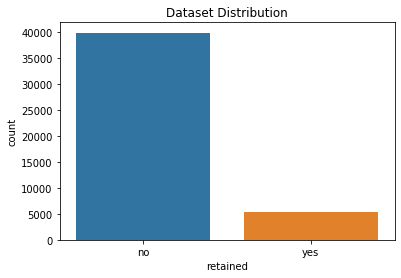

In [5]:
# Looking at the overall data distribution
sns.countplot(df.retained)
plt.title('Dataset Distribution')
plt.show()

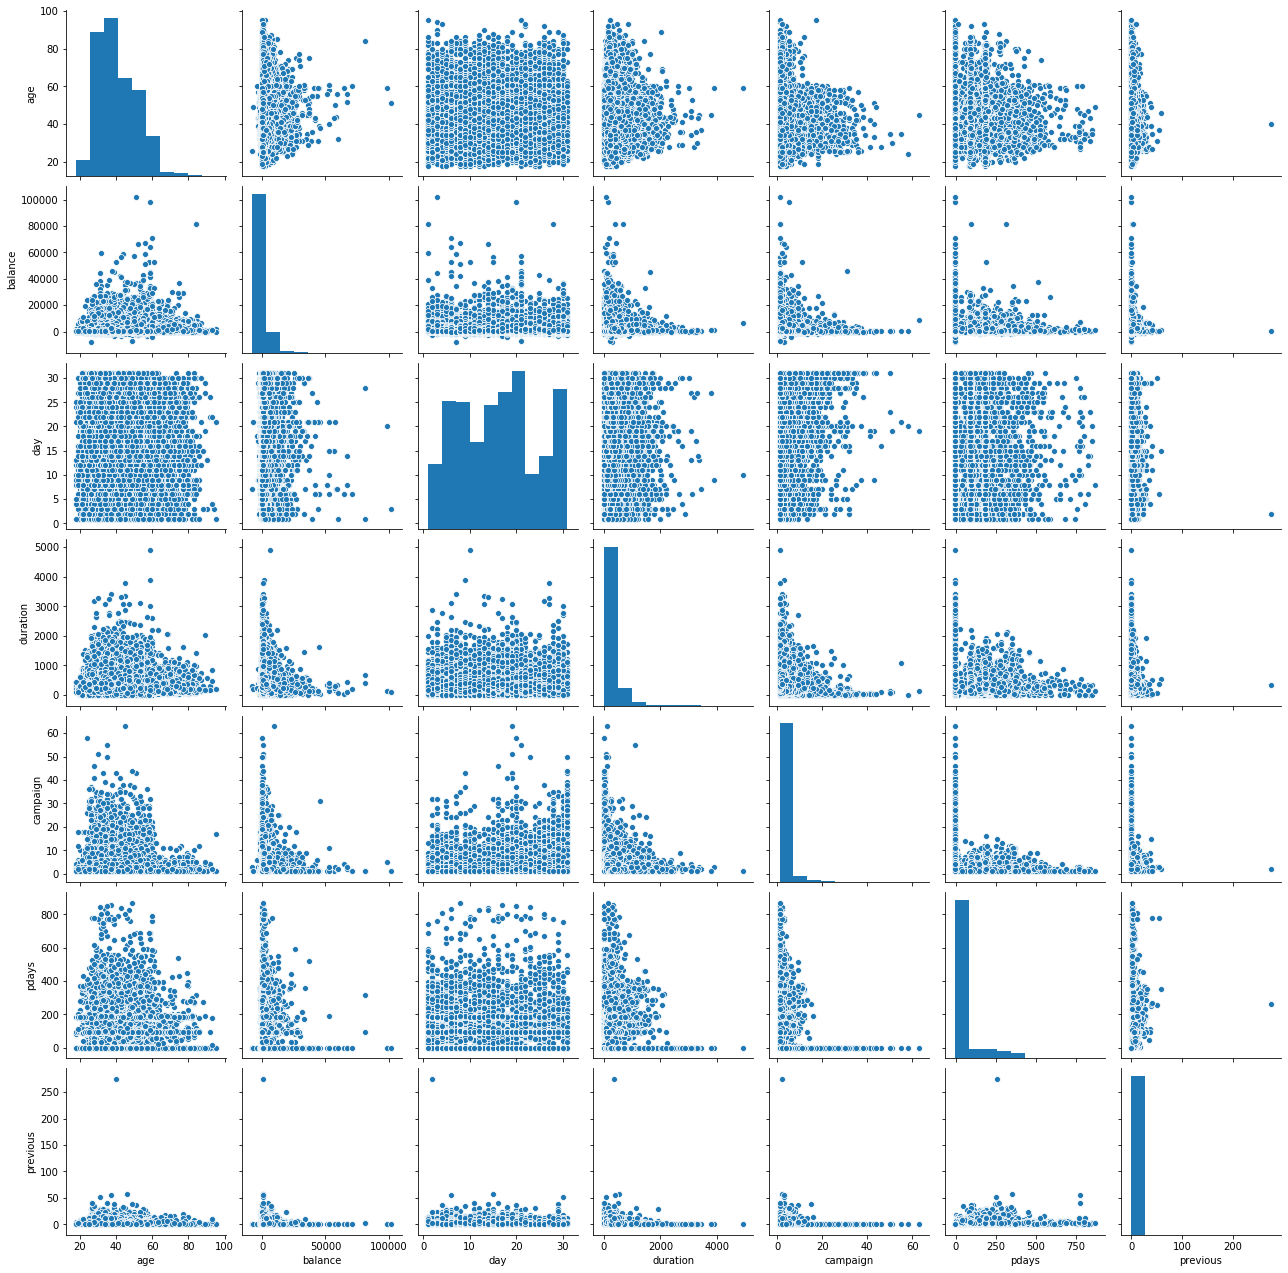

In [6]:
# Looking at the numerical data distribution
sns.pairplot(df)
plt.show()

### Client Demographical Features

C:\Users\adhee\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


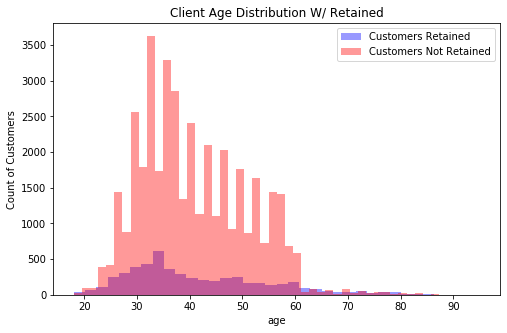

In [7]:
# Looking at the Age Distribution with respect to the retention
plt.figure(figsize=(8,5))
sns.distplot(df.age[df.retained == 'yes'],kde=False,color='b',label='Customers Retained')
sns.distplot(df.age[df.retained == 'no'],kde=False,color='r',label='Customers Not Retained')
plt.ylabel('Count of Customers')
plt.title('Client Age Distribution W/ Retained')
plt.legend()
plt.show()

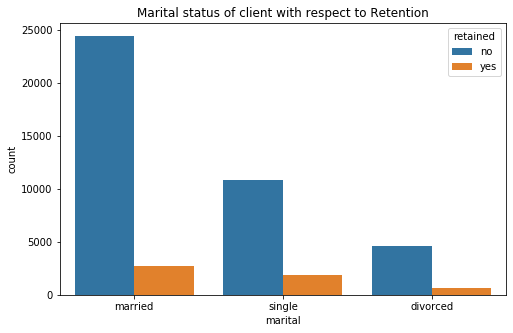

In [8]:
# Looking at the Marital status of client with respect to Retention
plt.figure(figsize=(8,5))
sns.countplot(df.marital,hue=df.retained)
plt.title('Marital status of client with respect to Retention')
plt.show()

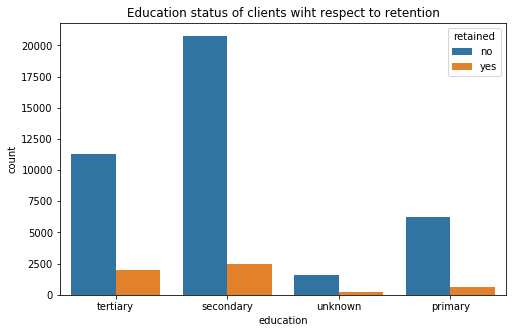

In [9]:
# Looking at the education status of clients wiht respect to retenttion
plt.figure(figsize=(8,5))
sns.countplot(df.education,hue=df.retained)
plt.title('Education status of clients wiht respect to retention')
plt.show()

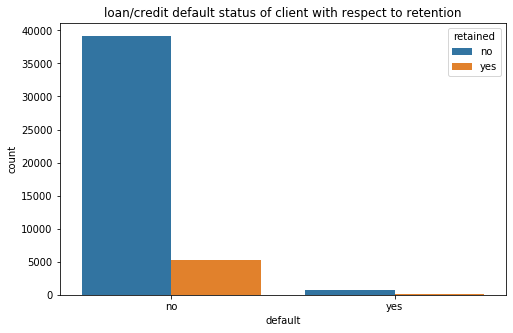

In [10]:
# Looking at the loan/credit default status of client with respect to retention
plt.figure(figsize=(8,5))
sns.countplot(df.default,hue=df.retained)
plt.title('loan/credit default status of client with respect to retention')
plt.show()

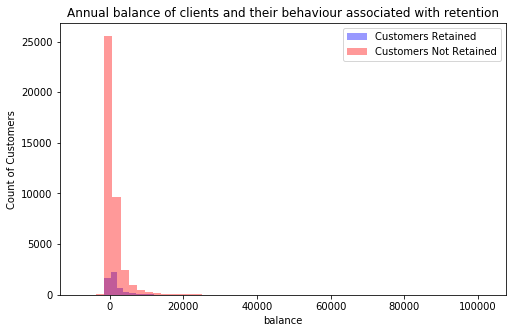

In [11]:
# Looking at annual balance of clients and their behaviour associated with retention
plt.figure(figsize=(8,5))
sns.distplot(df.balance[df.retained == 'yes'],kde=False,color='b',label='Customers Retained')
sns.distplot(df.balance[df.retained == 'no'],kde=False,color='r',label='Customers Not Retained')
plt.ylabel('Count of Customers')
plt.title('Annual balance of clients and their behaviour associated with retention')
plt.legend()
plt.show()

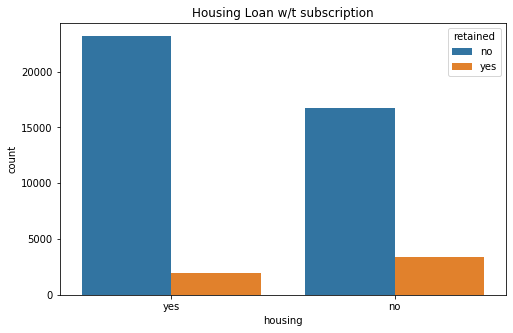

In [12]:
# Looking at housing loan status with respect to retention
plt.figure(figsize=(8,5))
sns.countplot(df.housing,hue=df.retained)
plt.title('Housing Loan w/t subscription')
plt.show()

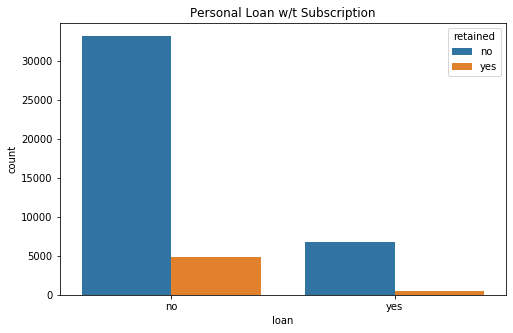

In [13]:
# Looking at personal loan status with respect to retention
plt.figure(figsize=(8,5))
sns.countplot(df.loan,hue=df.retained)
plt.title('Personal Loan w/t Subscription')
plt.show()

### Current Campaign Related features

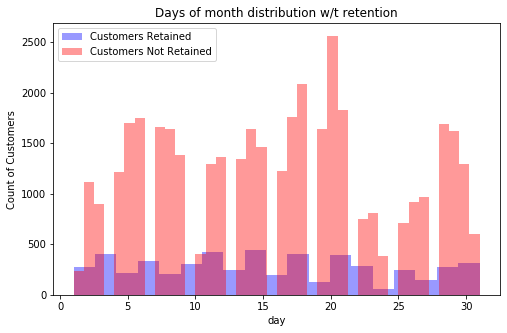

In [14]:
# Looking at the Days of month behaviour according to retention
plt.figure(figsize=(8,5))
sns.distplot(df.day[df.retained == 'yes'],kde=False,color='b',label='Customers Retained')
sns.distplot(df.day[df.retained == 'no'],kde=False,color='r',label='Customers Not Retained')
plt.ylabel('Count of Customers')
plt.title('Days of month distribution w/t retention')
plt.legend()
plt.show()

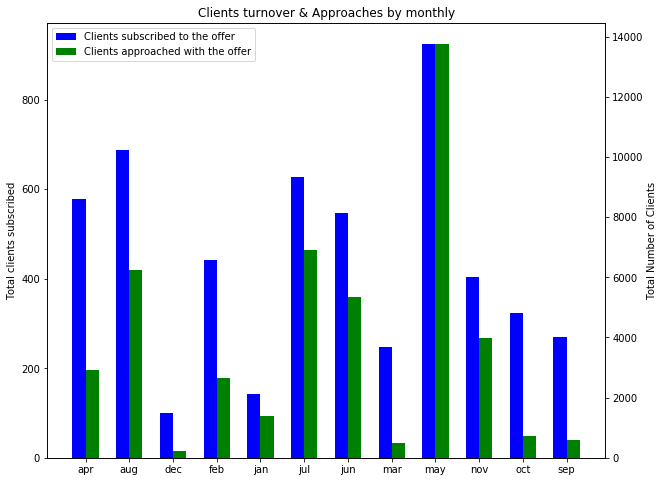

In [15]:
# Getting clients turnouer and overall approaches per month
retained = df[df.retained == 'yes'].groupby('month')['day'].count()
total = df.groupby('month')['day'].count()
month_order = ['apr','aug','dec','feb','jan','jul','jun','mar','may','nov','oct','sep']

# Plotting the clients based on the monthly aproaches & turnover
plt.figure(figsize=(10,8))
x = np.arange(12)
ax1 = plt.subplot(1,1,1)
w = 0.3
plt.xticks(x+w/2,month_order)
subscribed = ax1.bar(x,retained,width=w, color='b', align='center')
plt.ylabel('Total clients subscribed')
ax2 = ax1.twinx()
approached = ax2.bar(x+w,total,width=w,color='g',align='center')
plt.ylabel('Total Number of Clients')
plt.legend([subscribed,approached],['Clients subscribed to the offer','Clients approached with the offer'])
plt.title('Clients turnover & Approaches by monthly')
plt.show()

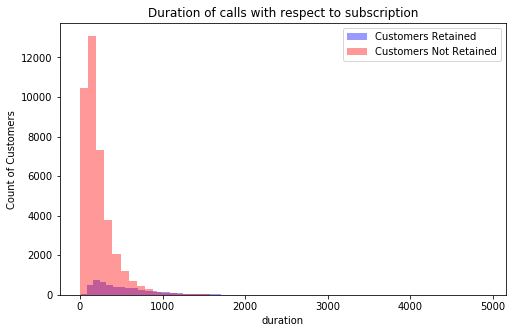

In [16]:
# Looking at the duration of calls made with respect to retained
plt.figure(figsize=(8,5))
sns.distplot(df.duration[df.retained == 'yes'],kde=False,color='b',label='Customers Retained')
sns.distplot(df.duration[df.retained == 'no'],kde=False,color='r',label='Customers Not Retained')
plt.ylabel('Count of Customers')
plt.title('Duration of calls with respect to subscription')
plt.legend()
plt.show()

### Previous Campaign Related Features

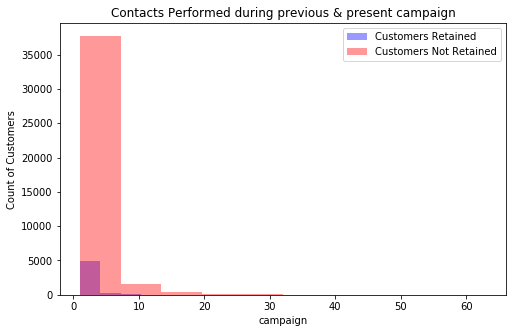

In [17]:
# Looking at the Contacts Performed during previous & present campaign with respect to retention 
plt.figure(figsize=(8,5))
sns.distplot(df.campaign[df.retained == 'yes'],kde=False,color='b',label='Customers Retained',bins=10)
sns.distplot(df.campaign[df.retained == 'no'],kde=False,color='r',label='Customers Not Retained',bins=10)
plt.ylabel('Count of Customers')
plt.title('Contacts Performed during previous & present campaign')
plt.legend()
plt.show()

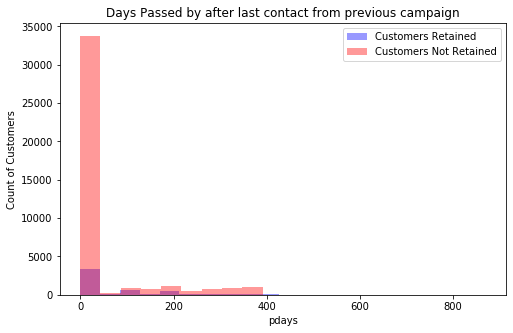

In [18]:
# Looking at the Days Passed by after last contact from previous campaign
plt.figure(figsize=(8,5))
sns.distplot(df.pdays[df.retained == 'yes'],kde=False,color='b',label='Customers Retained',bins=20)
sns.distplot(df.pdays[df.retained == 'no'],kde=False,color='r',label='Customers Not Retained',bins=20)
plt.ylabel('Count of Customers')
plt.title('Days Passed by after last contact from previous campaign')
plt.legend()
plt.show()

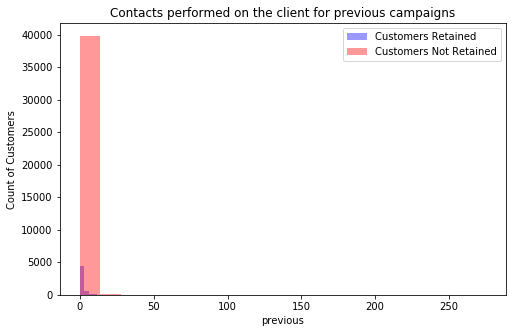

In [19]:
# Looking at the contacts performed on the client for previous campaigns
plt.figure(figsize=(8,5))
sns.distplot(df.previous[df.retained == 'yes'],kde=False,color='b',label='Customers Retained',bins=20)
sns.distplot(df.previous[df.retained == 'no'],kde=False,color='r',label='Customers Not Retained',bins=20)
plt.ylabel('Count of Customers')
plt.title('Contacts performed on the client for previous campaigns')
plt.legend()
plt.show()

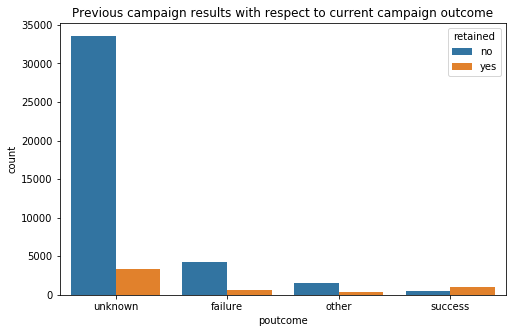

In [20]:
# Looking at the Previous campaign results with respect to current campaign outcome
plt.figure(figsize=(8,5))
sns.countplot(df.poutcome,hue=df.retained)
plt.title('Previous campaign results with respect to current campaign outcome')
plt.show()

### Data Pre-processing & Feature Engineering

In [21]:
# Converitng the categorical variables into dummies
df.retained = pd.get_dummies(df.retained,drop_first=True)
d_1 = pd.get_dummies(df.marital,drop_first=True).rename(columns=lambda x: 'marital_' + str(x))
df = pd.concat([df, d_1], axis=1)
d_3 = pd.get_dummies(df.education,drop_first=True).rename(columns=lambda x: 'education_' + str(x))
df = pd.concat([df, d_3], axis=1)
d_4 = pd.get_dummies(df.default,drop_first=True).rename(columns=lambda x: 'default_' + str(x))
df = pd.concat([df, d_4], axis=1)
d_5 = pd.get_dummies(df.housing,drop_first=True).rename(columns=lambda x: 'housing_' + str(x))
df = pd.concat([df, d_5], axis=1)
d_6 = pd.get_dummies(df.loan,drop_first=True).rename(columns=lambda x: 'personal_loan_' + str(x))
df = pd.concat([df, d_6], axis=1)
d_8 = pd.get_dummies(df.month,drop_first=True).rename(columns=lambda x: 'month_' + str(x))
df = pd.concat([df, d_8], axis=1)
d_9 = pd.get_dummies(df.poutcome,drop_first=True).rename(columns=lambda x: 'poutcome_' + str(x))
df = pd.concat([df, d_9], axis=1)
df.drop(['marital','education','default','housing','loan','month','poutcome'],inplace=True,axis=1)

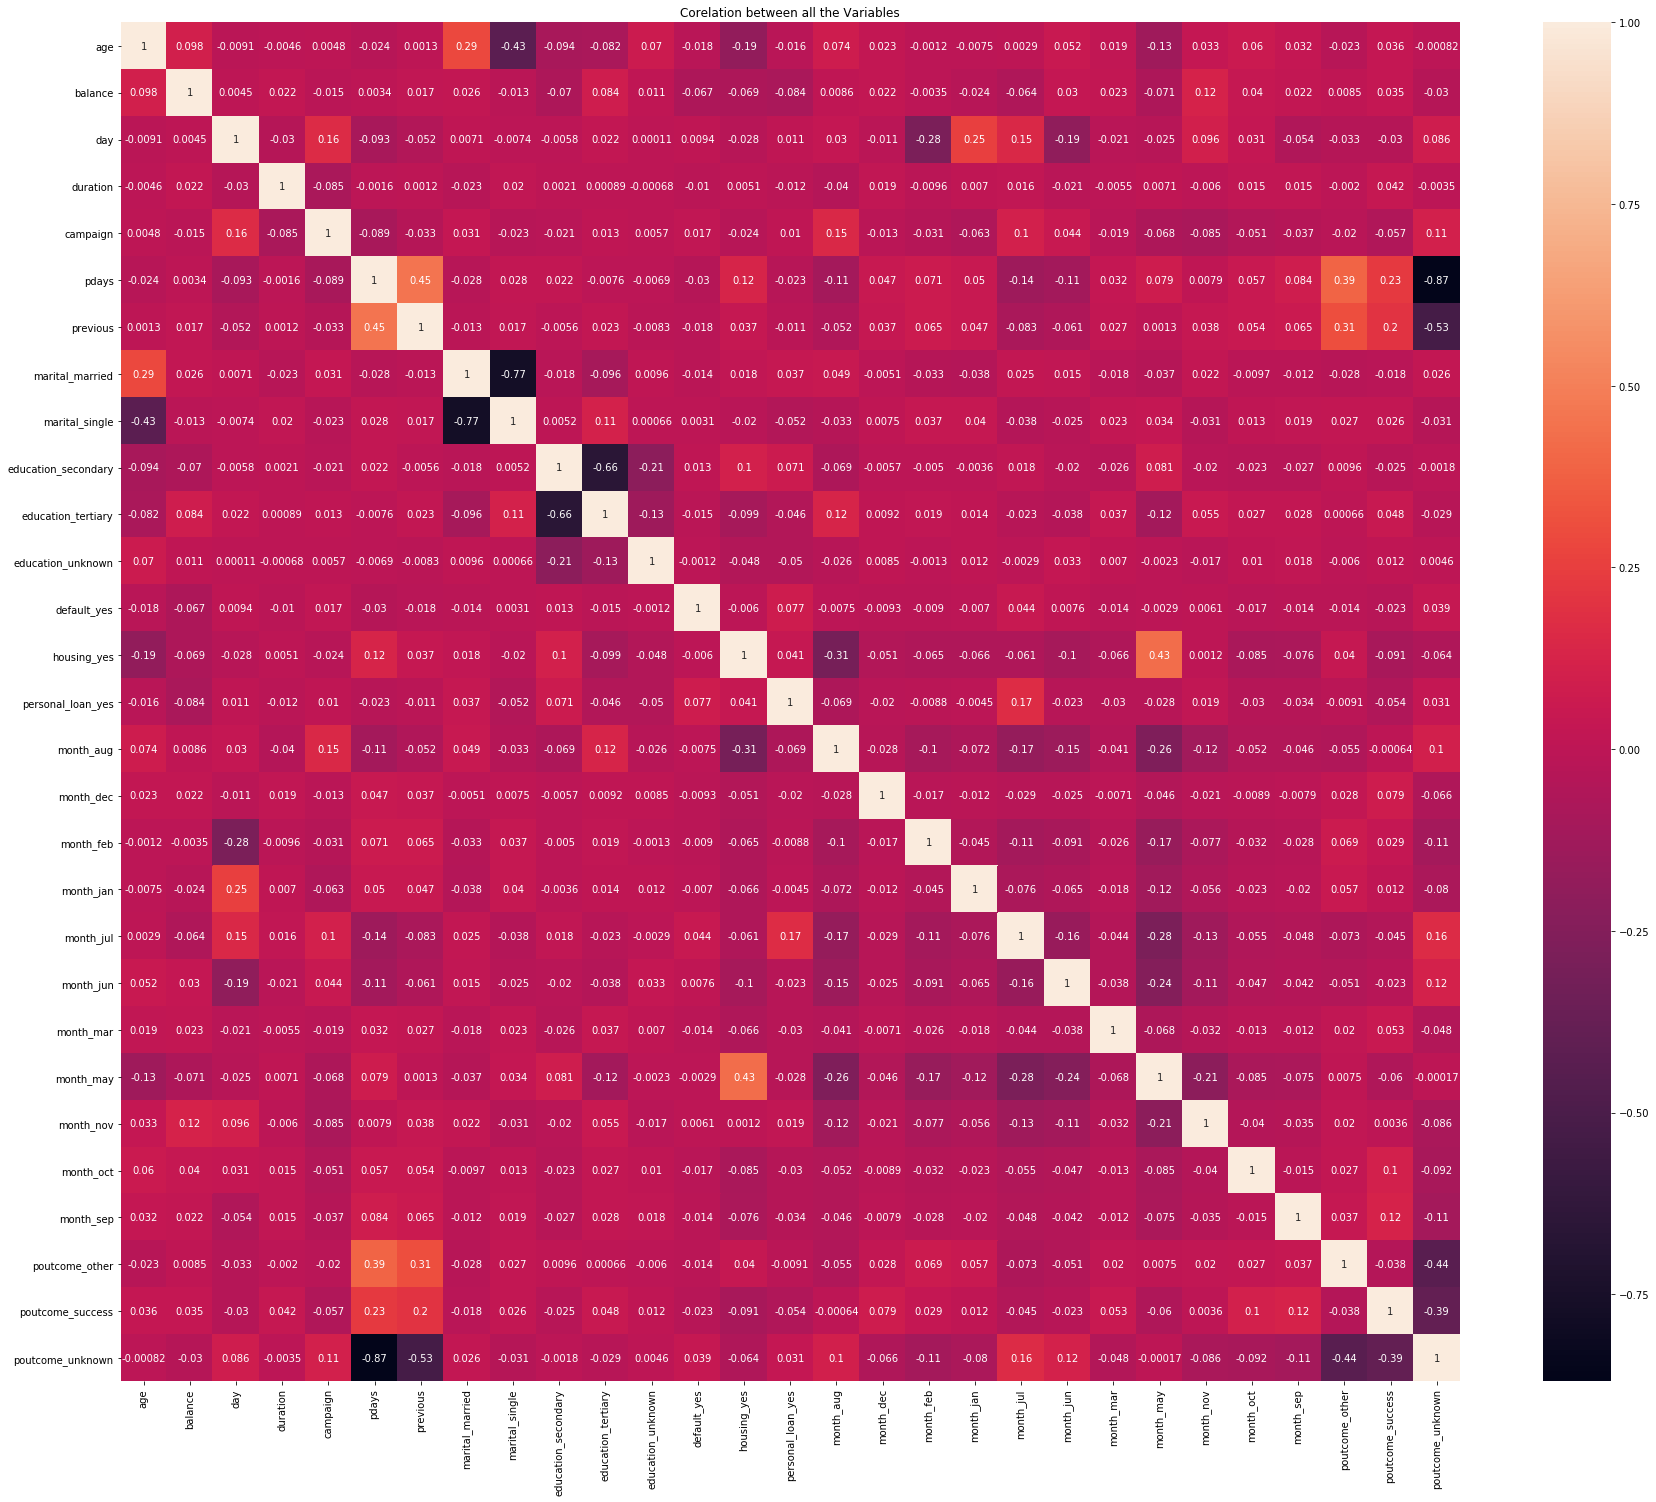

In [22]:
# Plotting the covariance matrix between all the variables
plt.figure(figsize=(30,25))
x = df.drop(columns=['retained'],axis=1)
X = x.corr()
sns.heatmap(X,annot=True,xticklabels=x.columns,yticklabels=x.columns)
plt.title('Corelation between all the Variables')
plt.show()

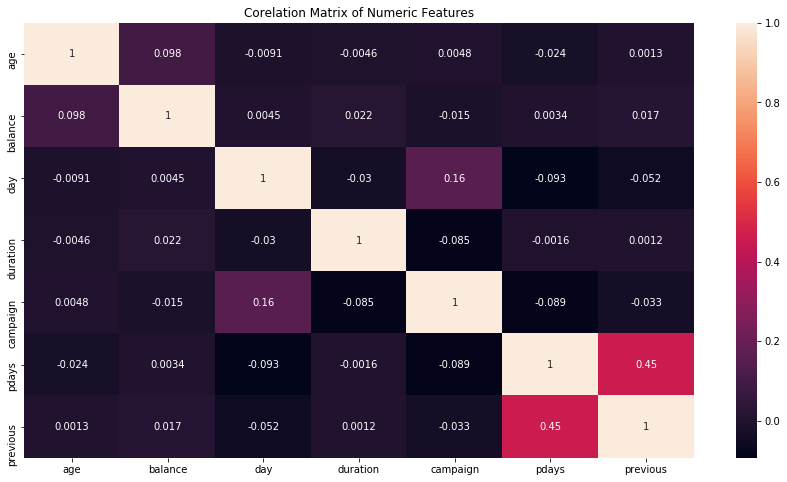

In [23]:
# Plotting the corelations between the numerical variables
plt.figure(figsize=(15,8))
x = df[['age','balance','day','duration','campaign','pdays','previous']]
X = x.corr()
sns.heatmap(X,annot=True,xticklabels=x.columns,yticklabels=x.columns)
plt.title('Corelation Matrix of Numeric Features')
plt.show()

In [24]:
# Standardising the numeric data
numeric = df[['age','balance','day','duration','campaign','pdays','previous']]
std = StandardScaler()
numeric_std = std.fit_transform(numeric.values)
numeric_df = pd.DataFrame(numeric_std,columns=['age','balance','day','duration','campaign','pdays','previous'])
# Getting the sategorical variables
cat = df.drop(columns=['age','balance','day','duration','campaign','pdays','previous'])
# Merging into new Dataset
std_df = pd.concat([cat,numeric_df],axis=1)

## Model Selection

In [25]:
# Creating a pandas for looking at the test,train & validation dataset values
Y_results_test = pd.DataFrame(columns = ['Classifier','classifier_run','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity']) 

Y_results_valid = pd.DataFrame(columns = ['Classifier','classifier_run','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity'])

Y_results_train = pd.DataFrame(columns = ['Classifier','classifier_run','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity'])


In [26]:
# Looping the classifiers to run 5 time, by randomly selecting the datasets into training, testing & validation.
for i in range(0,5):
    # Splitting the data into 60% training, 20% validation & 20% testing
    train, validate, test = np.split(std_df.sample(frac=1),[int(.6*len(std_df)), int(.8*len(std_df))])

    X_train = train.drop(columns=['retained'],axis=1).values
    y_train = train.retained.values

    X_valid = validate.drop(columns=['retained'],axis=1).values
    y_valid = validate.retained.values

    X_test = test.drop(columns=['retained'],axis=1).values
    y_test = test.retained.values

    # Looking at how all the classifiers behave for the train, valid & test Data.
    names = ["Nearest Neighbors","SVC",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost","Bagging","Gradient Boosting",
             "Naive Bayes","Logistic Regression","Hybrid"]

    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel='rbf'),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        BaggingClassifier(n_estimators=10),
        GradientBoostingClassifier(),
        GaussianNB(),
        LogisticRegression()]

    threshold = np.sum(1*(y_train==1))/len(y_train)                            # Recommended threshold = n_1/n

    Y_pred_valid = pd.DataFrame() # Declare a panda
    Y_pred_valid['Class_true'] = y_valid

    Y_pred_train = pd.DataFrame() # Declare a panda
    Y_pred_train['Class_true'] = y_train

    Y_pred_test = pd.DataFrame() # Declare a panda
    Y_pred_test['Class_true'] = y_test


    # iterate over classifiers
    for name, clf in zip(names, classifiers):

        if name is "Hybrid":
            Z = np.round(np.median(Y_pred_valid,axis=1),0).astype(int)
            Y_pred_valid[name] = Z
        else:

            clf.fit(X_train, y_train)

            # Testing performance
            score = clf.score(X_valid, y_valid)

            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(X_valid)
                #Y_pred[prob_name] = Z
                Z = clf.predict(X_valid)
                Y_pred_valid[name] = Z
            else:
                Z = clf.predict_proba(X_valid)
                Z = Z[:,1]                                                # Label for class 1
                #Y_pred[prob_name] = Z
                Y_pred_valid[name] = 1*(Z>threshold)

        TP_output = 1*((Y_pred_valid['Class_true']==1) & (Y_pred_valid[name] == 1))
        FP_output = 1*((Y_pred_valid['Class_true']==0) & (Y_pred_valid[name] == 1))
        TN_output = 1*((Y_pred_valid['Class_true']==0) & (Y_pred_valid[name] == 0))
        FN_output = 1*((Y_pred_valid['Class_true']==1) & (Y_pred_valid[name] == 0))

        TP = np.sum(TP_output)+1 # True positives
        FP = np.sum(FP_output)+1 # False positives
        TN = np.sum(TN_output)+1 # True negatives
        FN = np.sum(FN_output)+1 # False negatives
        TPR = TP/(TP+FN)          # True positive rate
        TNR = TN/(TN+FP)          # True negative rate
        Pr = TP/(TP+FP)
        Re = TP/(TP+FN)
        acc = (TP+TN)/(TP+FP+FN+TN)
        bal_acc = (TPR+TNR)/2
        F1 = 2*(Pr*Re)/(Pr+Re)
        run = i

        Y_results_valid = Y_results_valid.append({'Classifier': name,'classifier_run':name+'_'+str(i), 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)


        # Training performance
        if name is 'Hybrid':
            Z = np.round(np.median(Y_pred_train,axis=1),0).astype(int)
            Y_pred_train[name] = Z
        else:
            score = clf.score(X_train, y_train)

            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(X_train)
                #Y_pred_train[prob_name] = Z
                Z = clf.predict(X_train)
                Y_pred_train[name] = Z
            else:
                Z = clf.predict_proba(X_train)
                Z = Z[:,1]                                                # Label for class 1
                #Y_pred_train[prob_name] = Z
                Y_pred_train[name] = 1*(Z>threshold)

        TP_output = 1*((Y_pred_train['Class_true']==1) & (Y_pred_train[name] == 1))
        FP_output = 1*((Y_pred_train['Class_true']==0) & (Y_pred_train[name] == 1))
        TN_output = 1*((Y_pred_train['Class_true']==0) & (Y_pred_train[name] == 0))
        FN_output = 1*((Y_pred_train['Class_true']==1) & (Y_pred_train[name] == 0))

        TP = np.sum(TP_output)+1 # True positives
        FP = np.sum(FP_output)+1 # False positives
        TN = np.sum(TN_output)+1 # True negatives
        FN = np.sum(FN_output)+1 # False negatives
        TPR = TP/(TP+FN)          # True positive rate
        TNR = TN/(TN+FP)          # True negative rate
        Pr = TP/(TP+FP)
        Re = TP/(TP+FN)
        acc = (TP+TN)/(TP+FP+FN+TN)
        bal_acc = (TPR+TNR)/2
        F1 = 2*(Pr*Re)/(Pr+Re)
        Y_results_train = Y_results_train.append({'Classifier': name,'classifier_run':name+'_'+str(i), 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)

            # Testing performance
        if name is 'Hybrid':
            Z = np.round(np.median(Y_pred_test,axis=1),0).astype(int)
            Y_pred_test[name] = Z
        else:
            score = clf.score(X_test, y_test)

            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(X_test)
                #Y_pred_train[prob_name] = Z
                Z = clf.predict(X_test)
                Y_pred_test[name] = Z
            else:
                Z = clf.predict_proba(X_test)
                Z = Z[:,1]                                                # Label for class 1
                #Y_pred_train[prob_name] = Z
                Y_pred_test[name] = 1*(Z>threshold)

        TP_output = 1*((Y_pred_test['Class_true']==1) & (Y_pred_test[name] == 1))
        FP_output = 1*((Y_pred_test['Class_true']==0) & (Y_pred_test[name] == 1))
        TN_output = 1*((Y_pred_test['Class_true']==0) & (Y_pred_test[name] == 0))
        FN_output = 1*((Y_pred_test['Class_true']==1) & (Y_pred_test[name] == 0))

        TP = np.sum(TP_output)+1 # True positives
        FP = np.sum(FP_output)+1 # False positives
        TN = np.sum(TN_output)+1 # True negatives
        FN = np.sum(FN_output)+1 # False negatives
        TPR = TP/(TP+FN)          # True positive rate
        TNR = TN/(TN+FP)          # True negative rate
        Pr = TP/(TP+FP)
        Re = TP/(TP+FN)
        acc = (TP+TN)/(TP+FP+FN+TN)
        bal_acc = (TPR+TNR)/2
        F1 = 2*(Pr*Re)/(Pr+Re)
        run = i
        Y_results_test = Y_results_test.append({'Classifier': name,'classifier_run':name+'_'+str(i), 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)

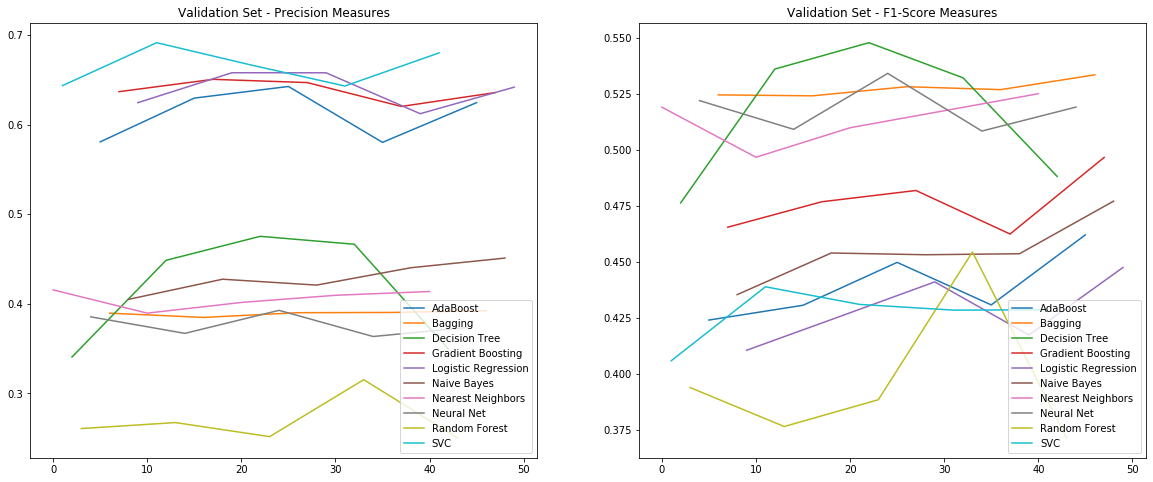

In [27]:
# Plotting the Precision & F1-scores for the validation sets
fig,(ax1,ax2) = plt.subplots(1,2)
Y_results_valid.groupby('Classifier')['Precision'].plot(kind='line',legend=True,ax=ax1,figsize=(20,8))
Y_results_valid.groupby('Classifier')['F1_score'].plot(kind='line',legend=True,ax=ax2,figsize=(20,8))
ax1.set_title('Validation Set - Precision Measures')
ax2.set_title('Validation Set - F1-Score Measures')
plt.show()

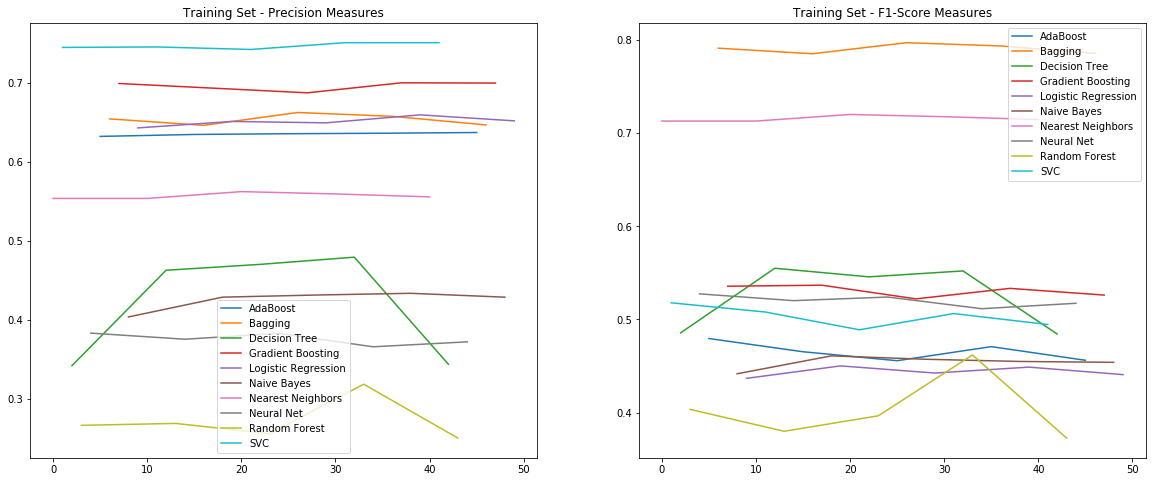

In [28]:
# Plotting the precision and validation scores for the training sets
fig, (ax1,ax2) = plt.subplots(1,2)
Y_results_train.groupby('Classifier')['Precision'].plot(kind='line',legend=True,ax=ax1,figsize=(20,8))
Y_results_train.groupby('Classifier')['F1_score'].plot(kind='line',legend=True,ax=ax2,figsize=(20,8))
ax1.set_title('Training Set - Precision Measures')
ax2.set_title('Training Set - F1-Score Measures')
plt.show()

## Model Tuning

In [29]:
# Again, Dividing the dataframe into training, testing & validation with fixed randomness.
train, validate, test = np.split(std_df.sample(frac=1,random_state=42),[int(.6*len(std_df)), int(.8*len(std_df))])

X_train = train.drop(columns=['retained'],axis=1).values
y_train = train.retained.values

X_valid = validate.drop(columns=['retained'],axis=1).values
y_valid = validate.retained.values

X_test = test.drop(columns=['retained'],axis=1).values
y_test = test.retained.values

In [30]:
# Checking for an optimum Maximum Depth value
c_range = np.arange(1,10,1)
f1 = np.ones(len(c_range))
f1_test = np.ones(len(c_range))
pr = np.ones(len(c_range))
pr_test = np.ones(len(c_range))
k = 0
for c in c_range:

    grad = GradientBoostingClassifier(max_depth=c,n_estimators=100,learning_rate=0.1)
    grad.fit(X_train,y_train)
    pred_train = grad.predict(X_train)
    pred_test = grad.predict(X_valid)
    f1[k] = f1_score(y_train,pred_train)
    f1_test[k] = f1_score(y_valid,pred_test)
    pr[k] = precision_score(y_train,pred_train)
    pr_test[k] = precision_score(y_valid,pred_test)
    k = k+1

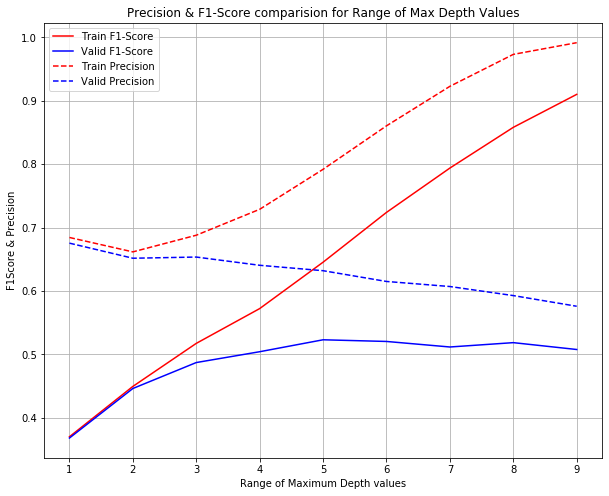

In [31]:
# Plotting the Maximum Depth Values with F1Score for train and test
plt.figure(figsize=(10,8))
line1, = plt.plot(c_range,f1,'r',label='Train F1-Score')
line2, = plt.plot(c_range,f1_test,'b',label='Valid F1-Score')
line3, = plt.plot(c_range,pr,'r--',label='Train Precision')
line4, = plt.plot(c_range,pr_test,'b--',label='Valid Precision')
plt.legend()
plt.xlabel('Range of Maximum Depth values')
plt.ylabel('F1Score & Precision')
plt.title('Precision & F1-Score comparision for Range of Max Depth Values')
plt.grid()
plt.show()

In [32]:
# Checking for an optimum Estimators value
c_range = np.arange(1,500,50)
f1 = np.ones(len(c_range))
f1_test = np.ones(len(c_range))
pr = np.ones(len(c_range))
pr_test = np.ones(len(c_range))
k = 0
for c in c_range:

    grad = GradientBoostingClassifier(max_depth=3,n_estimators=c,learning_rate=0.1)
    grad.fit(X_train,y_train)
    pred_train = grad.predict(X_train)
    pred_test = grad.predict(X_valid)
    f1[k] = f1_score(y_train,pred_train)
    f1_test[k] = f1_score(y_valid,pred_test)
    pr[k] = precision_score(y_train,pred_train)
    pr_test[k] = precision_score(y_valid,pred_test)
    k = k+1

C:\Users\adhee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


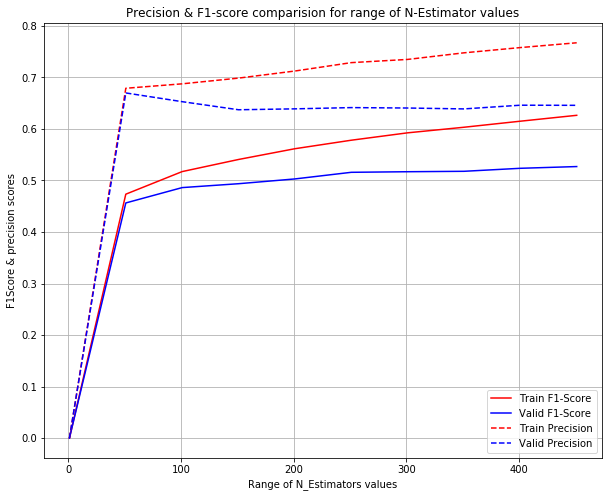

In [33]:
# Plotting the n_estimators Values with F1Score for train and test
plt.figure(figsize=(10,8))
line1, = plt.plot(c_range,f1,'r',label='Train F1-Score')
line2, = plt.plot(c_range,f1_test,'b',label='Valid F1-Score')
line3, = plt.plot(c_range,pr,'r--',label='Train Precision')
line4, = plt.plot(c_range,pr_test,'b--',label='Valid Precision')
plt.legend()
plt.xlabel('Range of N_Estimators values')
plt.ylabel('F1Score & precision scores')
plt.title('Precision & F1-score comparision for range of N-Estimator values')
plt.grid()
plt.show()

In [34]:
# Checking for an optimum learning rate value
c_range = np.arange(0.01,0.1,0.01)
f1 = np.ones(len(c_range))
f1_test = np.ones(len(c_range))
pr = np.ones(len(c_range))
pr_test = np.ones(len(c_range))
k = 0
for c in c_range:

    grad = GradientBoostingClassifier(max_depth=4,n_estimators=200,learning_rate=c)
    grad.fit(X_train,y_train)
    pred_train = grad.predict(X_train)
    pred_test = grad.predict(X_valid)
    f1[k] = f1_score(y_train,pred_train)
    f1_test[k] = f1_score(y_valid,pred_test)
    pr[k] = precision_score(y_train,pred_train)
    pr_test[k] = precision_score(y_valid,pred_test)
    k = k+1

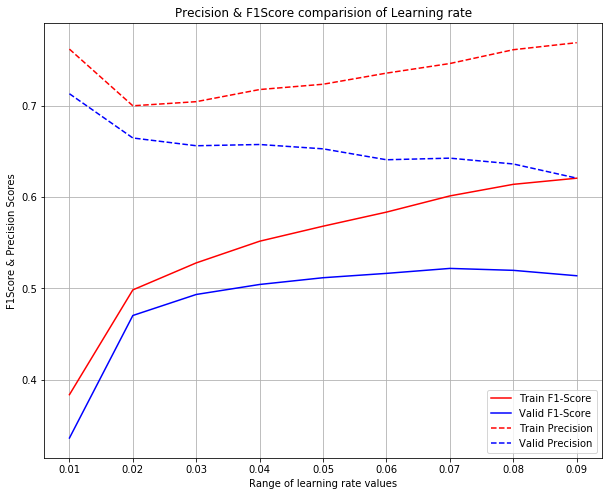

In [35]:
# Plotting the n_estimators Values with F1Score for train and test
plt.figure(figsize=(10,8))
line1, = plt.plot(c_range,f1,'r',label='Train F1-Score')
line2, = plt.plot(c_range,f1_test,'b',label='Valid F1-Score')
line3, = plt.plot(c_range,pr,'r--',label='Train Precision')
line4, = plt.plot(c_range,pr_test,'b--',label='Valid Precision')
plt.legend()
plt.xlabel('Range of learning rate values')
plt.ylabel('F1Score & Precision Scores')
plt.title('Precision & F1Score comparision of Learning rate')
plt.grid()
plt.show()

In [36]:
# Final Model Building and predicting the test set outcome
grad = GradientBoostingClassifier(max_depth=3,n_estimators=300,learning_rate=0.07)
grad.fit(X_train,y_train)
preds = grad.predict(X_test)
print(classification_report(y_test,preds))
print(' ')
print(confusion_matrix(y_test,preds))
print(' ')
print('The precision score of test set is:',np.round((precision_score(y_test,preds))*100,2),'%')
print('The F1-Score of test set is:',np.round((f1_score(y_test,preds))*100,2),'%')
print('The Accuracy of the model is:',np.round((accuracy_score(y_test,preds))*100,2),'%')

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7980
           1       0.67      0.42      0.52      1063

    accuracy                           0.91      9043
   macro avg       0.80      0.70      0.73      9043
weighted avg       0.90      0.91      0.90      9043

 
[[7759  221]
 [ 612  451]]
 
The precision score of test set is: 67.11 %
The F1-Score of test set is: 51.99 %
The Accuracy of the model is: 90.79 %


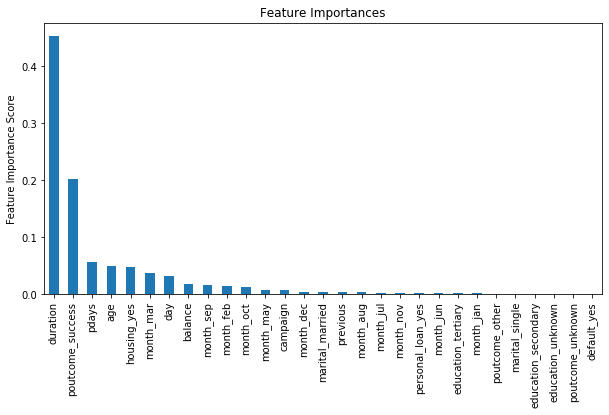

In [37]:
# Plotting the feature importance of the Gradient Boosting classifier
plt.figure(figsize=(10,5))
feat_imp = pd.Series(grad.feature_importances_, std_df.drop(columns=['retained']).columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

## Sampling

In [38]:
# Getting the X & y variables
X = std_df.drop(columns='retained').values
y = std_df.retained.values

# Implementing the Over Sampling SMOTE technique
os = SMOTE()
X_resampled, y_resampled = os.fit_resample(X, y)

# Splitting the data into Train & test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [39]:
# Final Model Building and predicting the test set outcome
grad = GradientBoostingClassifier(max_depth=3,n_estimators=300,learning_rate=0.07)
grad.fit(X_train,y_train)
preds = grad.predict(X_test)
print(classification_report(y_test,preds))
print(' ')
print(confusion_matrix(y_test,preds))
print(' ')
print('The precision score of test set is:',np.round((precision_score(y_test,preds))*100,2),'%')
print('The F1-Score of test set is:',np.round((f1_score(y_test,preds))*100,2),'%')
print('The Accuracy of the model is:',np.round((accuracy_score(y_test,preds))*100,2),'%')

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     13163
           1       0.91      0.93      0.92     13186

    accuracy                           0.92     26349
   macro avg       0.92      0.92      0.92     26349
weighted avg       0.92      0.92      0.92     26349

 
[[12011  1152]
 [  948 12238]]
 
The precision score of test set is: 91.4 %
The F1-Score of test set is: 92.1 %
The Accuracy of the model is: 92.03 %


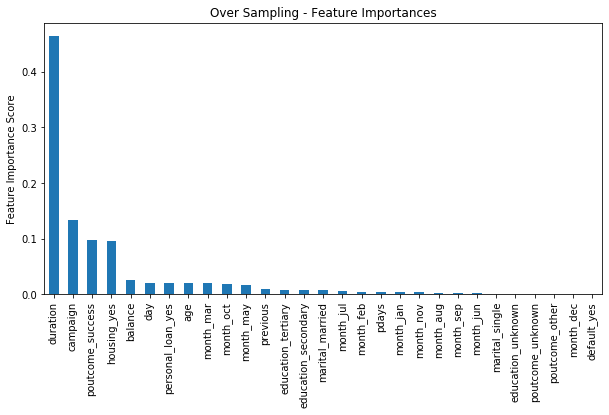

In [40]:
# Plotting the feature importance of the Gradient Boosting classifier
plt.figure(figsize=(10,5))
feat_imp = pd.Series(grad.feature_importances_, std_df.drop(columns=['retained']).columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Over Sampling - Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [41]:
# Getting the X and y variables
X = std_df.drop(columns='retained').values
y = std_df.retained.values

# Implementing the under sampling technique - Tome K links
tk = TomekLinks()
X_resampled, y_resampled = tk.fit_resample(X, y)

# Splitting the data into train and test for performance evaluation
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [42]:
# Final Model Building and predicting the test set outcome
grad = GradientBoostingClassifier(max_depth=3,n_estimators=300,learning_rate=0.07)
grad.fit(X_train,y_train)
preds = grad.predict(X_test)
print(classification_report(y_test,preds))
print(' ')
print(confusion_matrix(y_test,preds))
print(' ')
print('The precision score of test set is:',np.round((precision_score(y_test,preds))*100,2),'%')
print('The F1-Score of test set is:',np.round((f1_score(y_test,preds))*100,2),'%')
print('The Accuracy of the model is:',np.round((accuracy_score(y_test,preds))*100,2),'%')

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12774
           1       0.69      0.49      0.57      1758

    accuracy                           0.91     14532
   macro avg       0.81      0.73      0.76     14532
weighted avg       0.90      0.91      0.91     14532

 
[[12396   378]
 [  902   856]]
 
The precision score of test set is: 69.37 %
The F1-Score of test set is: 57.22 %
The Accuracy of the model is: 91.19 %


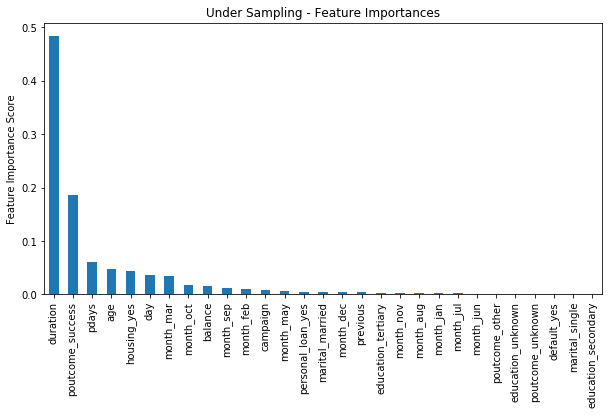

In [43]:
# Plotting the feature importance of the Gradient Boosting classifier
plt.figure(figsize=(10,5))
feat_imp = pd.Series(grad.feature_importances_, std_df.drop(columns=['retained']).columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Under Sampling - Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()